# Robomaster Test

This notebook serves as a testing ground for the models. Using videos captured by the robomaster in various settings, we are able to predict how the models will perform during the deployment

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.models import load_model
from tqdm import tqdm
from glob import glob
import re

In [2]:
def normalize(images):
    images = np.asarray(images)
    images = images / 255.0

    return images

We load the three videos that will be used for the qualitative testing testing

In [4]:
# read images in the folder
def read_images(folder_path):
    image_paths = sorted(glob(folder_path), key=lambda x: int(re.findall(r'\d+', x)[-1]))
    images = []
    c = 0
    for filename in tqdm(image_paths):
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if img is not None:
            images.append(img)
    return images


corridoio = read_images('../data/video/corridoio/imgs/*')
ostacoli = read_images('../data/video/ostacoli/imgs/*')
corr_os = read_images('../data/video/corridoio_ostacoli/imgs/*')

100%|██████████| 268/268 [00:02<00:00, 120.86it/s]


In [4]:
print(len(corridoio), len(ostacoli), len(corr_os))

400 632 268


In [5]:
# resize images to 224x224
def resize_images(images):
    resized_images = []
    for image in tqdm(images):
        resized_image = cv2.resize(image, (224, 224))
        resized_images.append(resized_image)
    return resized_images

corridoio = resize_images(corridoio)
ostacoli = resize_images(ostacoli)
corr_os = resize_images(corr_os)

100%|██████████| 268/268 [00:00<00:00, 4544.65it/s]


We plot a sample image

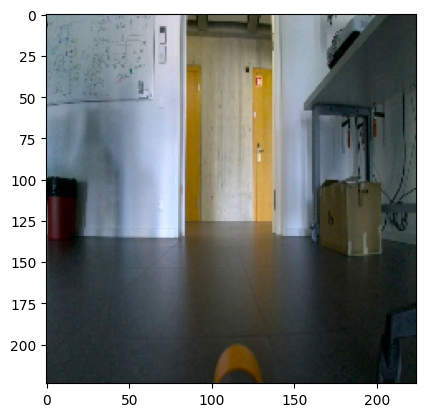

In [6]:
plt.imshow(corridoio[0])

Now we show the whole video frame by frame

In [7]:
# Visualization
import ipywidgets as ipw
@ipw.interact(i=ipw.Play(min=0,max=len(corridoio)-1))
def f(i):
    fig, ax = plt.subplots()
    ax.imshow(corridoio[i])
    # show image number
    ax.text(0, 0, i, color='black', fontsize=20)
    plt.show()

interactive(children=(Play(value=0, description='i', max=399), Output()), _dom_classes=('widget-interact',))

In [8]:

@ipw.interact(i=ipw.Play(min=0,max=len(ostacoli)-1))
def f(i):
    fig, ax = plt.subplots()
    ax.imshow(ostacoli[i])
    # show image number
    ax.text(0, 0, i, color='black', fontsize=20)
    plt.show()

interactive(children=(Play(value=0, description='i', max=631), Output()), _dom_classes=('widget-interact',))

## Loading the models

Base model

In [10]:
# load model
model = load_model('models/unet_mixed_data.hdf5', compile=False)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['auc'])

Model trained with augmentation

In [12]:
model_aug = load_model('models\\unet_aug.hdf5', compile=False)
model_aug.compile(optimizer='adam', loss='binary_crossentropy', metrics=['auc'])

Model Fine Tuned on university grounds

In [21]:
model_ft = load_model('models\\unet_aug_fine_tuned_uni.hdf5', compile=False)
model_ft.compile(optimizer='adam', loss='binary_crossentropy', metrics=['auc'])

Running predictions for all videos, for each model

In [14]:
corridoio_pred = model.predict(normalize(np.array(corridoio)))
ostacoli_pred = model.predict(normalize(np.array(ostacoli)))
corr_os_pred = model.predict(normalize(np.array(corr_os)))

9/9 [==============================] - 0s 18ms/step


In [15]:
corridoio_pred_aug = model_aug.predict(normalize(np.array(corridoio)))
ostacoli_pred_aug = model_aug.predict(normalize(np.array(ostacoli)))
corr_os_pred_aug = model_aug.predict(normalize(np.array(corr_os)))

9/9 [==============================] - 0s 16ms/step


In [22]:
corridoio_pred_ft = model_ft.predict(normalize(np.array(corridoio)))
ostacoli_pred_ft = model_ft.predict(normalize(np.array(ostacoli)))
corr_os_pred_ft = model_ft.predict(normalize(np.array(corr_os)))

9/9 [==============================] - 0s 15ms/step


In [23]:
# Visualization
import ipywidgets as ipw
@ipw.interact(i=ipw.Play(min=0,max=len(corridoio)-1))
def f(i):
    fig, ax = plt.subplots(3, 3, figsize=(15, 15))
    ax[0][0].imshow(corridoio[i])
    ax[0][0].imshow(corridoio_pred[i], alpha=0.5)
    ax[0][1].imshow(corridoio[i])
    ax[0][2].imshow(corridoio_pred[i])
    # show image number
    ax[0][0].text(0, -10, i, color='black', fontsize=20)
    ax[0][0].text(250, -10, 'Regular Model', color='black', fontsize=20)
    
    ax[1][0].imshow(corridoio[i])
    ax[1][0].imshow(corridoio_pred_aug[i], alpha=0.5)
    ax[1][1].imshow(corridoio[i])
    ax[1][2].imshow(corridoio_pred_aug[i])
    # show image number
    ax[1][0].text(250, -10, 'Augmented Model', color='black', fontsize=20)
    
    ax[2][0].imshow(corridoio[i])
    ax[2][0].imshow(corridoio_pred_ft[i], alpha=0.5)
    ax[2][1].imshow(corridoio[i])
    ax[2][2].imshow(corridoio_pred_ft[i])
    # show image number
    ax[2][0].text(250, -10, 'Fine Tuned', color='black', fontsize=20)
    plt.show()

interactive(children=(Play(value=0, description='i', max=399), Output()), _dom_classes=('widget-interact',))

In [24]:
# Visualization
import ipywidgets as ipw
@ipw.interact(i=ipw.Play(min=0,max=len(ostacoli)-1, interval=240))
def f(i):
    fig, ax = plt.subplots(3, 3, figsize=(15, 15))
    ax[0][0].imshow(ostacoli[i])
    ax[0][0].imshow(ostacoli_pred_aug[i], alpha=0.5)
    ax[0][1].imshow(ostacoli[i])
    ax[0][2].imshow(ostacoli_pred_aug[i])
    # show image number
    ax[0][0].text(0, -10, i, color='black', fontsize=20)
    ax[0][0].text(250, -10, 'Regular Model', color='black', fontsize=20)
    
    ax[1][0].imshow(ostacoli[i])
    ax[1][0].imshow(ostacoli_pred_aug[i], alpha=0.5)
    ax[1][1].imshow(ostacoli[i])
    ax[1][2].imshow(ostacoli_pred_aug[i])
    # show image number
    ax[1][0].text(250, -10, 'Augmented Model', color='black', fontsize=20)
    
    ax[2][0].imshow(ostacoli[i])
    ax[2][0].imshow(ostacoli_pred_ft[i], alpha=0.5)
    ax[2][1].imshow(ostacoli[i])
    ax[2][2].imshow(ostacoli_pred_ft[i])
    # show image number
    ax[2][0].text(250, -10, 'Fine Tuned Model', color='black', fontsize=20)
    plt.show()

interactive(children=(Play(value=0, description='i', interval=240, max=631), Output()), _dom_classes=('widget-…

In [26]:
# Visualization
import ipywidgets as widgets
@widgets.interact(i=widgets.Play(min=0,max=len(corr_os)-1, step=1))
def f(i):
    fig, ax = plt.subplots(3, 3, figsize=(15, 15))
    ax[0][0].imshow(corr_os[i])
    ax[0][0].imshow(corr_os_pred[i], alpha=0.5)
    ax[0][1].imshow(corr_os[i])
    ax[0][2].imshow(corr_os_pred[i])
    # show image number
    ax[0][0].text(0, -10, i, color='black', fontsize=20)
    ax[0][0].text(250, -10, 'Regular Model', color='black', fontsize=20)
    
    ax[1][0].imshow(corr_os[i])
    ax[1][0].imshow(corr_os_pred_aug[i], alpha=0.5)
    ax[1][1].imshow(corr_os[i])
    ax[1][2].imshow(corr_os_pred_aug[i])
    # show image number
    ax[1][0].text(250, -10, 'Augmented Model', color='black', fontsize=20)
    ax[2][0].imshow(corr_os[i])
    ax[2][0].imshow(corr_os_pred_ft[i], alpha=0.5)
    ax[2][1].imshow(corr_os[i])
    ax[2][2].imshow(corr_os_pred_ft[i])
    # show image number
    ax[2][0].text(250, -10, 'Augmented Model', color='black', fontsize=20)
    plt.show()

interactive(children=(Play(value=0, description='i', max=267), Output()), _dom_classes=('widget-interact',))